In [3]:
#Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install rasterio
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install geopandas


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

In [4]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Access Cloud Optimized Geotiffs with AWS

In [26]:
fpath = '/content/drive/MyDrive/Yosemite/Elevation2.tif'

from rasterio.enums import Resampling

factors = [2, 4, 8, 16]
dst = rio.open(fpath, 'r+')
dst.build_overviews(factors, Resampling.average)
dst.update_tags(ns='rio_overview', resampling='average')
dst.close()

def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open(fpath)
print(src_image.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1468, 'height': 374, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195214, 0.0, -120.25301425332455,
       0.0, -0.0008983152841195214, 37.91343608701719), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [27]:
overview = src_image.overviews(1)
overview

[2, 4, 8, 16]

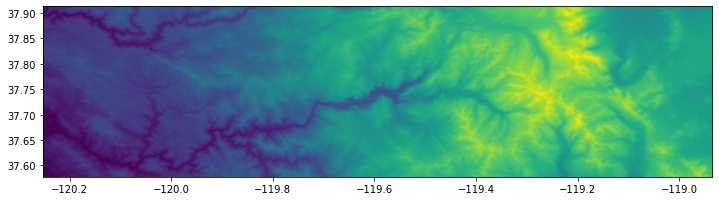

In [30]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [31]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype("f4")
src_image_array

array([[ 36.,  34.,  33., ..., 110., 110., 110.],
       [ 35.,  33.,  32., ..., 111., 111., 111.],
       [ 34.,  33.,  33., ..., 111., 111., 111.],
       ...,
       [ 13.,  14.,  15., ..., 152., 153., 153.],
       [ 13.,  14.,  14., ..., 151., 153., 154.],
       [ 13.,  13.,  14., ..., 150., 152., 153.]], dtype=float32)

In [32]:
src_image_array[src_image_array==0] = np.nan

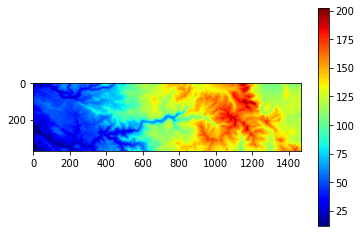

In [44]:
#fig, ax = plt.subplots(1, figsize=(12, 10))
shw = plt.imshow(src_image_array, cmap = "jet")
plt.colorbar(shw)
plt.show()

In [34]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1468, 'height': 374, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195214, 0.0, -120.25301425332455,
       0.0, -0.0008983152841195214, 37.91343608701719), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

## Get subset of the image

Window(col_off, row_off, width, height)

In [35]:
window = rio.windows.Window(300, 0, 300, 300)

In [36]:



subset = src_image.read(1, window=window)

In [ ]:
#subset.profile

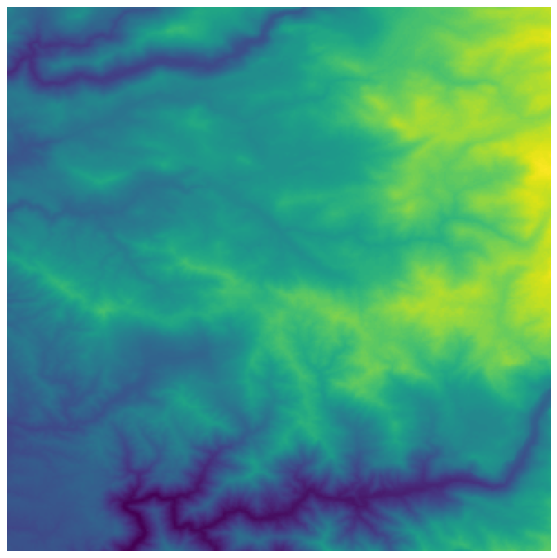

In [37]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

## RGB

In [ ]:
rpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'
gpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B3.TIF'
bpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B2.TIF'

In [ ]:
red = rio.open(rpath)
green = rio.open(gpath)
blue = rio.open(bpath)

In [ ]:
red_array = red.read(1)
green_array = green.read(1)
blue_array = blue.read(1)

In [ ]:
red.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [ ]:
red.width

7601

In [ ]:
src_image.transform

Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0)

In [ ]:
# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=red.width, height=red.height, 
              count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as rgb:
    rgb.write(blue.read(1),1) 
    rgb.write(green.read(1),2) 
    rgb.write(red.read(1),3) 
    rgb.close()

In [ ]:
rgb = rio.open("/content/RGB.tiff")

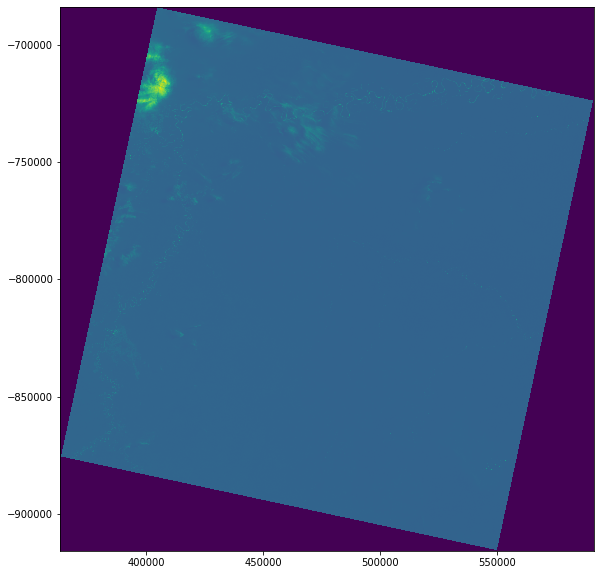

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(rgb, ax=ax, cmap="viridis")
plt.show()

#END